In [1]:
%matplotlib inline
import pandas as pd

In [2]:
%install_ext https://raw.github.com/cpcloud/ipython-autotime/master/autotime.py
%load_ext autotime
from pyspark import SQLContext
sqlContext = SQLContext(sc)

import pyspark.sql.functions as F
import numpy as np

%matplotlib inline
import matplotlib
matplotlib.use('Agg')
#import matplotlib.pyplot
import matplotlib.pyplot as plt

Installed autotime.py. To use it, type:
  %load_ext autotime


/home/victor/miniconda/lib/python2.7/site-packages/IPython/core/magics/extension.py:47: UserWarning: %install_ext` is deprecated, please distribute your extension as a python package.
  "as a python package.", UserWarning)


In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [ ]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

In [3]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

NameError: name 'pd' is not defined

In [4]:
titles = sqlContext.read.parquet(os.path.expanduser('~/Dropbox/Projects/data/movielens_p/titles'))
titles.cache()
cast = sqlContext.read.parquet(os.path.expanduser('~/Dropbox/Projects/data/movielens_p/cast'))
cast.cache()

DataFrame[title: string, year: int, name: string, type: string, character: string, n: int]

### What are the ten most common movie names of all time?

In [5]:
titles.groupby('title').count().sort('count', ascending=False).show()

+--------------------+-----+
|               title|count|
+--------------------+-----+
|              Hamlet|   19|
|             Macbeth|   14|
|              Carmen|   14|
|The Three Musketeers|   12|
|        The Outsider|   11|
|                 She|   11|
|                Maya|   11|
|         Blood Money|   11|
|              Kismet|   10|
|         The Promise|   10|
|         Underground|   10|
|             Victory|   10|
|          Borderline|   10|
|       Anna Karenina|   10|
|          Temptation|   10|
|                 Eva|   10|
|               Karma|   10|
|                Love|   10|
|             Othello|   10|
|            Paradise|    9|
+--------------------+-----+
only showing top 20 rows



### Which three years of the 1930s saw the most films released?

In [9]:
titles[(titles.year >= 1930) & (titles.year <= 1939)].groupby('year').count().sort('count', ascending=False).show(3)

+----+-----+
|year|count|
+----+-----+
|1937| 1184|
|1936| 1121|
|1938| 1117|
+----+-----+
only showing top 3 rows

time: 1.32 s


### Plot the number of films that have been released each decade over the history of cinema.

In [29]:
# looks like there is not a good way to plot directly using Spark DataFrame yet. Needs databricks' display() as of now. 
decades = titles.select((F.floor(titles.year / 10) * 10).alias('decade')).toPandas()

time: 1.46 s


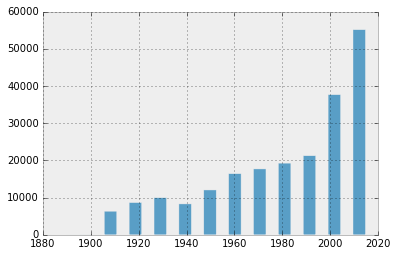

time: 196 ms


In [30]:
plt.style.use('bmh')
d = np.array(decades)
plt.hist(d, histtype="stepfilled", bins=25, alpha=0.8)
plt.show()

### Plot the number of "Hamlet" films made each decade.

In [31]:
decades = titles[titles.title == 'Hamlet'].select((F.floor(titles.year / 10) * 10).alias('decade')).toPandas()

time: 219 ms


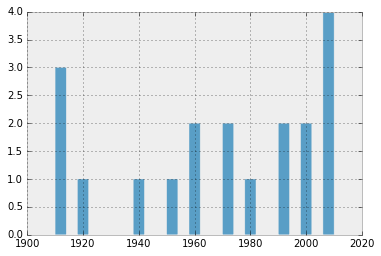

time: 178 ms


In [32]:
plt.style.use('bmh')
d = np.array(decades)
plt.hist(d, histtype="stepfilled", bins=25, alpha=0.8)
plt.show()

### Plot the number of "Rustler" characters in each decade of the history of film.

In [34]:
decades = cast[cast.character == 'Rustler'].select((F.floor(cast.year / 10) * 10).alias('decade')).toPandas()

time: 6.47 s


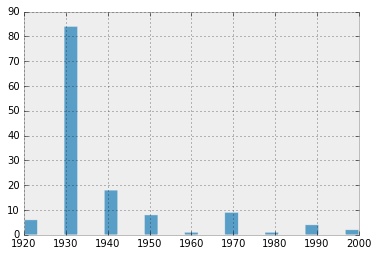

time: 171 ms


In [35]:
plt.style.use('bmh')
d = np.array(decades)
plt.hist(d, histtype="stepfilled", bins=25, alpha=0.8)
plt.show()

### Plot the number of "Batman" characters each decade.

In [9]:
decades = cast[cast.character == 'Batman'].select((F.floor(cast.year / 10) * 10).alias('decade')).toPandas()

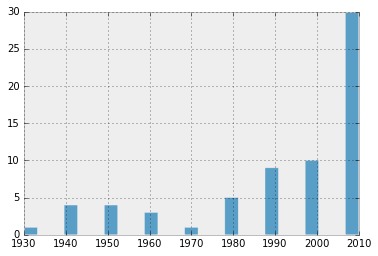

In [10]:
plt.style.use('bmh')
d = np.array(decades)
plt.hist(d, histtype="stepfilled", bins=25, alpha=0.8)
plt.show()

### What are the 11 most common character names in movie history?

In [38]:
cast.groupby('character').count().sort('count', ascending=False).show(10)

+----------+-----+
| character|count|
+----------+-----+
|   Himself|18819|
|    Dancer|10952|
|     Extra| 8684|
|  Reporter| 7558|
|    Doctor| 6749|
| Policeman| 6443|
|   Student| 6339|
|     Nurse| 6108|
| Bartender| 6082|
|Minor Role| 5793|
+----------+-----+
only showing top 10 rows

time: 3.65 s


### Who are the 10 people most often credited as "Herself" in film history?

In [39]:
cast[cast.character == 'Herself'].groupby('name').count().sort('count', ascending=False).show(10)

+-------------------+-----+
|               name|count|
+-------------------+-----+
|     Joyce Brothers|   14|
| Queen Elizabeth II|   11|
|  Margaret Thatcher|    8|
|        Joan Rivers|    7|
|       Mary Jo Pehl|    7|
|        Juhi Chawla|    5|
|Sally Jessy Raphael|    5|
|      Caroline Rhea|    5|
|     Marilyn Monroe|    5|
|     Kareena Kapoor|    5|
+-------------------+-----+
only showing top 10 rows

time: 1.16 s


### Who are the 10 people most often credited as "Himself" in film history?

In [40]:
cast[cast.character == 'Himself'].groupby('name').count().sort('count', ascending=False).show(10)

+--------------------+-----+
|                name|count|
+--------------------+-----+
|        Adolf Hitler|   92|
|       Richard Nixon|   38|
|       Ronald Reagan|   30|
|     John F. Kennedy|   26|
|          Ron Jeremy|   23|
|   Winston Churchill|   21|
|Franklin D. Roose...|   20|
|      George W. Bush|   20|
|        Bill Clinton|   20|
|  Martin Luther King|   19|
+--------------------+-----+
only showing top 10 rows

time: 1.11 s


### Which actors or actresses appeared in the most movies in the year 1945?

In [41]:
cast[cast.year == 1945].groupby('name').count().sort('count', ascending=False).first()

Row(name=u'Emmett Vogan', count=39)

time: 5.6 s


In [44]:
# in case someone as more characters in one movie
cast[cast.year == 1945].select('title', 'name').distinct().groupby('name').count().sort('count', ascending=False).show(1)

+------------+-----+
|        name|count|
+------------+-----+
|Emmett Vogan|   39|
+------------+-----+
only showing top 1 row

time: 3.26 s


### Which actors or actresses appeared in the most movies in the year 1985?

In [45]:
cast[cast.year == 1985].select('title', 'name').distinct().groupby('name').count().sort('count', ascending=False).show(1)

+---------+-----+
|     name|count|
+---------+-----+
|Mammootty|   17|
+---------+-----+
only showing top 1 row

time: 3.45 s


### Plot how many roles Mammootty has played in each year of his career.

In [48]:
cast[cast.name == 'Mammootty'].groupby('year').count().sort('year', ascending=False).show(50)

+----+-----+
|year|count|
+----+-----+
|2015|    1|
|2014|    6|
|2013|    5|
|2012|    7|
|2011|    7|
|2010|    9|
|2009|   12|
|2008|    9|
|2007|    7|
|2006|    8|
|2005|    6|
|2004|    8|
|2003|    2|
|2002|    3|
|2001|    3|
|2000|    7|
|1999|    4|
|1998|    3|
|1997|    2|
|1996|    3|
|1995|    5|
|1994|    4|
|1993|    5|
|1992|    2|
|1991|    5|
|1990|   15|
|1989|    9|
|1988|    7|
|1987|    9|
|1986|   15|
|1985|   17|
|1984|   15|
|1983|   17|
|1982|    6|
|1981|    2|
|1980|    1|
|1971|    1|
+----+-----+

time: 526 ms


### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [7]:
cast[cast.character.startswith('Patron in')].groupby('character').count().sort('count', ascending=False).show(10, truncate=False)

+----------------------------+-----+
|character                   |count|
+----------------------------+-----+
|Patron in Frisky Rabbit     |16   |
|Patron in the Coffee House  |9    |
|Patron in Chinese Restaurant|9    |
|Patron in Billiard Parlor   |5    |
|Patron in Bar               |4    |
|Patron in cabaret           |3    |
|Patron in restaurant        |3    |
|Patron in Restaurant        |3    |
|Patron in Club              |3    |
|Patron in Quiet Bar         |2    |
+----------------------------+-----+
only showing top 10 rows



### What are the 10 most frequent roles that start with the word "Science"?

In [8]:
cast[cast.character.startswith('Science')].groupby('character').count().sort('count', ascending=False).show(10, truncate=False)

+--------------------+-----+
|character           |count|
+--------------------+-----+
|Science Teacher     |53   |
|Science Fair Student|8    |
|Science Student     |8    |
|Science Fair Judge  |6    |
|Science Club Member |5    |
|Science Reporter    |5    |
|Science Promo Cadet |4    |
|Science Kid         |4    |
|Science Fair Kid    |3    |
|Science Officer     |3    |
+--------------------+-----+
only showing top 10 rows



### Plot the n-values of the roles that Judi Dench has played over her career.

In [19]:
judi = cast[cast.name == 'Judi Dench'].select('n').toPandas()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f767c387d10>]], dtype=object)

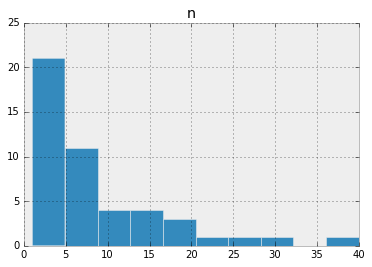

In [22]:
judi.hist()

### Plot the n-values of Cary Grant's roles through his career.

In [23]:
cary = cast[cast.name == 'Cary Grant'].select('n').toPandas()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f767c46cb90>]], dtype=object)

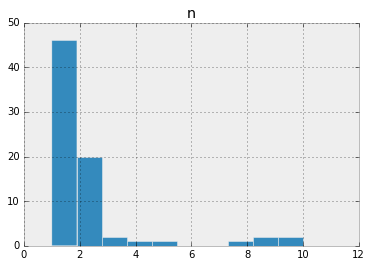

In [24]:
cary.hist()

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

In [25]:
sidney = cast[cast.name == 'Sidney Poitier'].select('n').toPandas()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f767c1f9490>]], dtype=object)

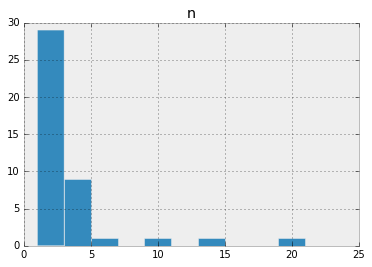

In [27]:
sidney.hist()

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [32]:
cast[(cast.n == 1) & cast.year.between(1950, 1959)].groupby('type').count().show()

+-------+-----+
|   type|count|
+-------+-----+
|actress| 2806|
|  actor| 6367|
+-------+-----+



### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [34]:
cast[(cast.n == 2) & cast.year.between(1950, 1959)].groupby('type').count().show()

+-------+-----+
|   type|count|
+-------+-----+
|actress| 4391|
|  actor| 4371|
+-------+-----+



### How many n roles were available to actors, and how many to actresses, by decade?

In [43]:
cast.select('type', 'n', (F.floor(cast.year / 10) * 10).alias('decade')).groupby(['decade', 'n', 'type']).count().sort(['decade', 'n', 'type']).show()

+------+----+-------+-----+
|decade|   n|   type|count|
+------+----+-------+-----+
|  1890|null|  actor|    4|
|  1890|null|actress|    1|
|  1890|   1|  actor|    2|
|  1890|   2|  actor|    2|
|  1900|null|  actor|   19|
|  1900|null|actress|    3|
|  1900|   1|  actor|    5|
|  1900|   1|actress|    1|
|  1900|   2|  actor|    5|
|  1900|   2|actress|    1|
|  1900|   3|  actor|    3|
|  1900|   3|actress|    1|
|  1900|   4|  actor|    2|
|  1900|   5|  actor|    2|
|  1900|   6|  actor|    1|
|  1900|   7|  actor|    1|
|  1900|   8|  actor|    1|
|  1900|   9|  actor|    1|
|  1900|  10|  actor|    2|
|  1900|  11|  actor|    1|
+------+----+-------+-----+
only showing top 20 rows



In [57]:
cast.select('n').sort('n', ascending=False).show()

+-----+
|    n|
+-----+
|33613|
|  999|
|  999|
|  999|
|  938|
|  910|
|  701|
|  700|
|  699|
|  698|
|  697|
|  696|
|  695|
|  694|
|  693|
|  692|
|  691|
|  690|
|  689|
|  688|
+-----+
only showing top 20 rows



array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f76717b3f90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f7671785950>], dtype=object)

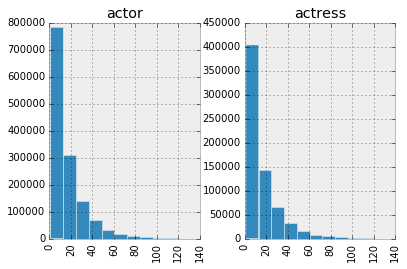

In [60]:
# cast.select('type', 'n', (F.floor(cast.year / 10) * 10).alias('decade')).toPandas().hist(by='type')
cast[cast.n <= 120].select('type', 'n').dropna().toPandas().hist(by='type')

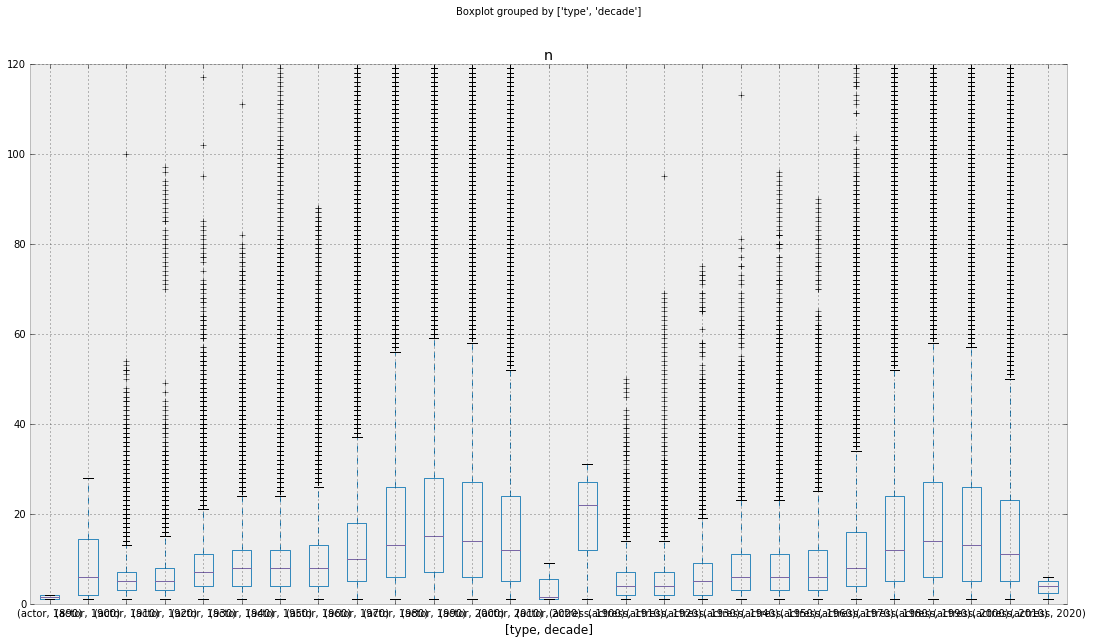

In [64]:
# cast.select('type', 'n', (F.floor(cast.year / 10) * 10).alias('decade')).toPandas().hist(by='type')
cast[cast.n <= 120].select((F.floor(cast.year / 10) * 10).alias('decade'), 'type', 'n').dropna().toPandas().boxplot(by=['type', 'decade'], figsize=(18, 10))

In [71]:
cast_pdf = cast[cast.n <= 120].select((F.floor(cast.year / 10) * 10).alias('decade'), 'type', 'n').groupby(['type', 'decade', 'n']).count().toPandas()

In [98]:
# cast_count = cast_pdf[(cast_pdf.decade > 1930) & (cast_pdf.decade < 2020)].set_index(['type', 'decade', 'n']).unstack(1)
cast_count = cast_pdf[(cast_pdf.decade == 2000)].set_index(['type', 'decade', 'n']).unstack(1)
cast_count.head()

count
decade    2000
type  n       
actor 1  17955
      2  13171
      3  13734
      4  13175
      5  12734

In [101]:
cast_count.reset_index(level=0).head()#plot(figsize=(18, 10))

,type,count
decade,,2000
n,,
1,actor,17955
2,actor,13171
3,actor,13734
4,actor,13175
5,actor,12734
